Recreation of example to gain an understanding of the RandomForest model

In [7]:
from sklearn import datasets
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

iris = datasets.load_iris()
print(iris.target_names)
print(iris.feature_names)
print(iris.data[0:5])
print(iris.target)

data = pd.DataFrame({
    'sepal length': iris.data[:,0], 
    'sepal width': iris.data[:,1], 
    'petal length': iris.data[:,2], 
    'petal width': iris.data[:,3], 
    'species': iris.target
})

data.head()
    
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

clf.predict([[3, 5, 4, 2]])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Accuracy: 0.9333333333333333


/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

Predicting with the RandomForest model

Score for training: 1.0
Score for testing: 1.0
[[ 25   0   0   0   0]
 [  0  39   0   0   0]
 [  0   0 145   0   0]
 [  0   0   0  62   0]
 [  0   0   0   0  37]]


/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


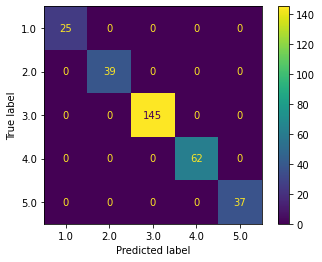

0 0 0 25
False negative rate: 0.000
Accuracy test set: 100.000
Accuracy train set: 100.000


In [37]:
# prediction with RandomForest model and without validation set

import pandas as pd
import numpy as np 
import numpy as mean
import numpy as std
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

data_dataframe = pd.read_csv('../TOCOM.csv', sep=';') 

# Preparing the dataframe
# Dropping NaN values:
data_dataframe.dropna(subset = ["Gender"], inplace=True)
data_dataframe.dropna(subset = ["Leeftijd"], inplace=True)
data_dataframe.dropna(subset = ["AST"], inplace=True)
data_dataframe.dropna(subset = ["BMI"], inplace=True)
data_dataframe.dropna(subset = ["Length_cm"], inplace=True)
data_dataframe.dropna(subset = ["Weight"], inplace=True)
data_dataframe.dropna(subset = ["MQ"], inplace=True)
data_dataframe.dropna(subset = ["MQ_category"], inplace=True)

# Dropping columns:
data_dataframe_modified = data_dataframe.drop(data_dataframe.columns[[0, 2, 3, 4, 6, 7, 9, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22,23,24,25,26,27,28,29,30,31,32,33,34, 35, 36]], axis=1)

X = data_dataframe_modified.iloc[:, :-1].values
y = data_dataframe_modified["MQ_category"].values

# Splitting dataframe in train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y) 

# RandomForest model:
rf_model = RandomForestClassifier(n_estimators=30)

# Using RandomForest model classifier in order to fit the data:
rf_model.fit(X_train, y_train)

# Predicting the y-data with the RandomForest classifier: 
y_predict = rf_model.predict(X_test)

# Getting the scores for the X_test and y_test subsets:
rf_model.score(X_test, y_test)

# Printing the scores:
print('Score for training: {}'.format(rf_model.score(X_train, y_train)))
print('Score for testing: {}'.format(rf_model.score(X_test, y_test)))

# Printing the confusion matrix:
confusionMatrix = confusion_matrix(y_test, y_predict)
print(confusionMatrix)

# Plotting the confusion matrix:
plot_confusion_matrix(rf_model, X_test, y_test)
plt.show()

# Calculating the false negative rate: 
tn, fp, fn, tp = confusion_matrix(y_test, y_predict, labels=[0, 1]).ravel()
print(tn, fp, fn, tp)
FalseNegativeRate= fp/(fp+tp)

# Printing the false negative rate:
print('False negative rate: %.3f' %(FalseNegativeRate))

# Calculating the accuracy: 
predict = rf_model.predict(X_train)
accuracyTrain = accuracy_score(y_train, predict)
accuracy = accuracy_score(y_test, y_predict)

# Printing the accuracy: 
print('Accuracy test set: %.3f' %(accuracy*100))
print('Accuracy train set: %.3f' %(accuracyTrain*100))


Score for training: 1.0
Score for testing: 1.0
[[ 25   0   0   0   0]
 [  0  39   0   0   0]
 [  0   0 145   0   0]
 [  0   0   0  62   0]
 [  0   0   0   0  37]]


/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


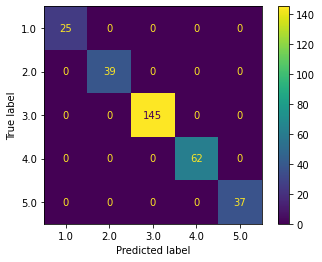

0 0 0 25
False negative rate: 0.000
Accuracy test set: 100.000
Accuracy train set: 100.000


In [38]:
# prediction with RandomForest model and with validation set

# Splitting dataframe in train, test and validation sets:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2 ,random_state=11111 , stratify = y) 
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=11111 )

# RandomForest model
rf_model = RandomForestClassifier(n_estimators=30)

# Using RandomForest model classifier in order to fit the data:
rf_model.fit(X_train, y_train)

# Predict y data with classifier: 
y_predict = rf_model.predict(X_test)

# Getting the scores for the X_test and y_test subsets:
rf_model.score(X_test, y_test)

# Printing the scores:
print('Score for training: {}'.format(rf_model.score(X_train, y_train)))
print('Score for testing: {}'.format(rf_model.score(X_test, y_test)))

# Printing the confusion matrix:
confusionMatrix = confusion_matrix(y_test, y_predict)
print(confusionMatrix)

# Plotting the confusion matrix:
plot_confusion_matrix(rf_model, X_test, y_test)
plt.show()

# Calculating the false negative rate: 
tn, fp, fn, tp = confusion_matrix(y_test, y_predict, labels=[0, 1]).ravel()
print(tn, fp, fn, tp)
FalseNegativeRate= fp/(fp+tp)

# Printing the false negative rate:
print('False negative rate: %.3f' %(FalseNegativeRate))

# Calculating the accuracy: 
predict = rf_model.predict(X_train)
accuracyTrain = accuracy_score(y_train, predict)
accuracy = accuracy_score(y_test, y_predict)

# Printing the accuracy: 
print('Accuracy test set: %.3f' %(accuracy*100))
print('Accuracy train set: %.3f' %(accuracyTrain*100))

Visualization of the comparison of predicted and original MQ categories

In [ ]:
# reading the already created data files for X and y: 
X_test_dataframe = pd.read_csv('../Resp_X_test.csv', sep=';') 
y_predict_dataframe = pd.read_csv('../y_predict_RF.csv', sep=';') 

# renaming columns:
X_test_dataframe.rename( columns={'Unnamed: 0':'ID'}, inplace=True )
X_test_dataframe.rename( columns={'0':'Respondentnumber'}, inplace=True )
X_test_dataframe.rename( columns={'4':'MQ'}, inplace=True )
X_test_dataframe.rename( columns={'5':'MQ_category'}, inplace=True )
y_predict_dataframe.rename( columns={'Unnamed: 0':'ID'}, inplace=True )
y_predict_dataframe.rename( columns={'0': 'Predicted_MQ_Category'}, inplace= True)

# assigning the column Predicted_MQ_Category of the y_predict_dataframe to a variable
# and joining that column to the X_test_dataframe:
predicted_MQCategory = y_predict_dataframe['Predicted_MQ_Category']
X_test_dataframe = X_test_dataframe.join(predicted_MQCategory)

# Creating the visualization (Worked on this topic together with Joep)
# set the x and y variables for the graph:
x = X_test_dataframe['Respondentnumber'].astype(int)
y1 = X_test_dataframe['MQ_category']
y2 = X_test_dataframe['Predicted_MQ_Category']

# creating the graph:
fig, ax = plt.subplots(figsize=(40,10))
ax = sns.swarmplot(x, y1, color= 'red', size = 8)
ax.set_xticks(ax.get_xticks()[::10])
ax = sns.swarmplot(x, y2, color="black", size= 8)
ax.set_title("Predicted and Original MQ categories", fontsize = 40, color = 'blue')
ax.set_xlabel("Childrens' IDs", fontsize = 30)
ax.set_ylabel("MQ categories", fontsize = 30)
plt.yticks([1, 2, 3, 4, 5])
plt.xticks(rotation=45, fontsize=20)
plt.show()




# OUTPUT: 
# in folder '/RandomForest/Output Screenshots': randomForest__with_data_comparison_output_1.png

Visualization of the difference between original and predicted MQ categories

In [ ]:
# Creating the visualization (Worked on this topic together with Joep)
# set the x and y variables for the graph:
x = X_test_dataframe['Respondentnumber'].astype(int)
y1 = X_test_dataframe['MQ_category']
y2 = X_test_dataframe['Predicted_MQ_Category']
y_difference = y2 - y1  

# creating the graph:
fig, ax = plt.subplots(figsize =(30,10))
ax = sns.swarmplot(x, y_difference, color= 'black', size = 10)
ax.set_xticks(ax.get_xticks()[::10])
ax.set_title("Difference between original and predicted MQ categories", fontsize = 40, color = 'blue')
ax.set_xlabel("Childrens' IDs", fontsize = 30)
ax.set_ylabel("Difference", fontsize = 30)
plt.yticks([-2, -1, 0, 1, 2])
plt.xticks(rotation = 45, fontsize = 20)
plt.show()




# OUTPUT: 
# in folder '/RandomForest/Output Screenshots': randomForest__with_data_comparison_output_2.png